In [17]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='', project_access_token='')
pc = project.project_context

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

# Reading the dataset

In [19]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/german_credit_data.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [20]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [21]:
df =df.drop(columns=['Unnamed: 0'])

In [22]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [23]:
df.shape

(1000, 10)

# Pre-processing and descriptive analysis

In [24]:
df.loc[df['Job'] == 1, 'Job'] = 'j1'
df.loc[df['Job'] == 2, 'Job'] = 'j2'
df.loc[df['Job'] == 3, 'Job'] = 'j3'
df.loc[df['Job'] == 0, 'Job'] = 'j0'

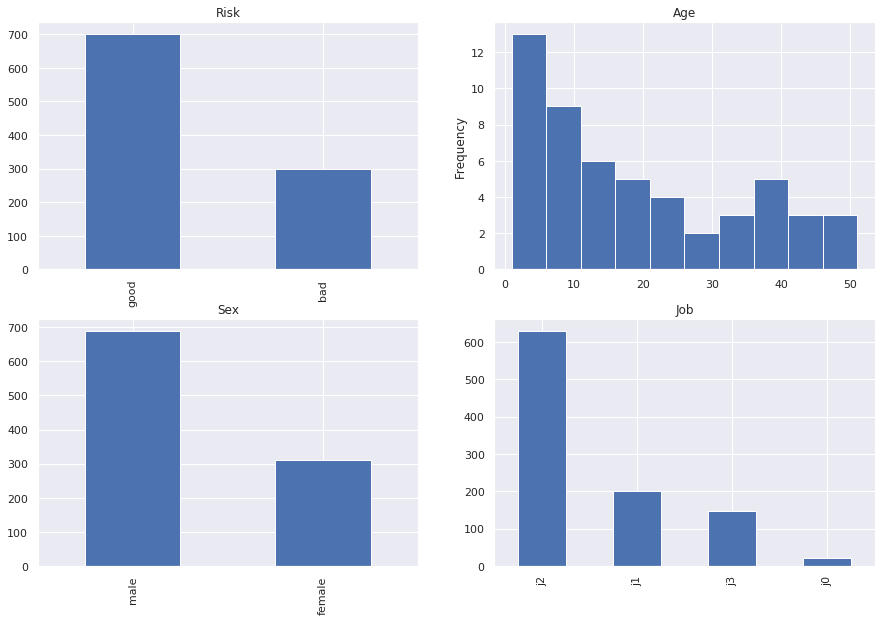

In [25]:
%matplotlib inline
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
df['Risk'].value_counts().plot(kind='bar', ax=ax1, title='Risk')
df['Age'].value_counts().plot(kind='hist', ax=ax2, title='Age')
df['Sex'].value_counts().plot(kind='bar', ax=ax3, title='Sex')
df['Job'].value_counts().plot(kind='bar', ax=ax4, title='Job')

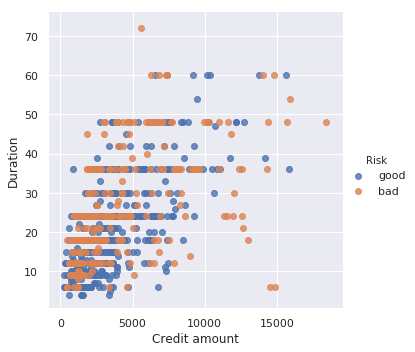

In [26]:
ax = sns.lmplot( x="Credit amount", y="Duration", data=df, fit_reg=False, hue='Risk', legend=True)

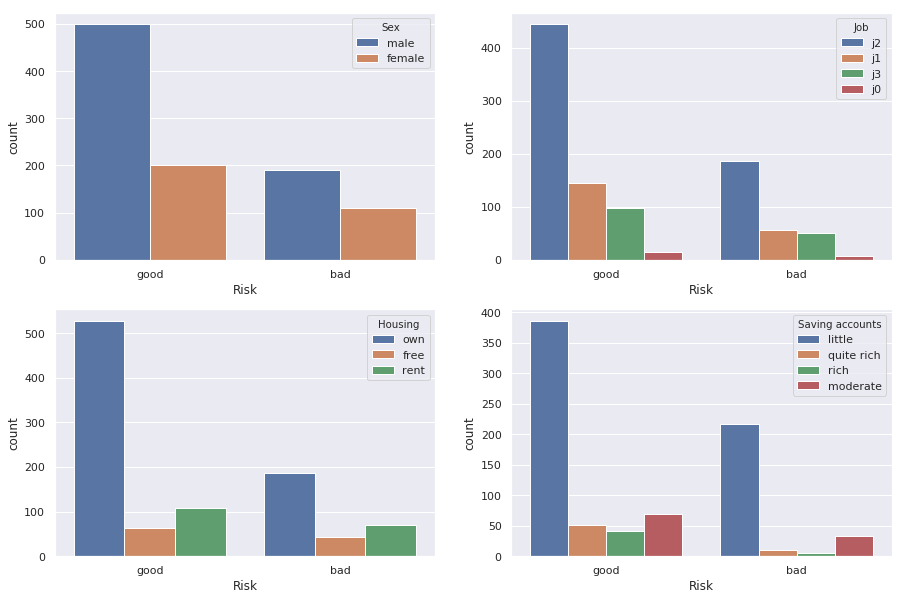

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax = sns.countplot(x="Risk", hue="Sex", data=df, ax=ax1)
ax = sns.countplot(x="Risk", hue="Job", data=df, ax=ax2)
ax = sns.countplot(x="Risk", hue="Housing", data=df, ax=ax3)
ax = sns.countplot(x="Risk", hue="Saving accounts", data=df, ax=ax4)

# Splitting training and validation datasets

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=4)

In [29]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [30]:
train['Risk'].value_counts()

good    559
bad     241
Name: Risk, dtype: int64

In [31]:
test['Risk'].value_counts()

good    141
bad      59
Name: Risk, dtype: int64

In [32]:
project.save_data("german_credit_train.csv", train.to_csv(header=True, index=False), overwrite=True)

{'file_name': 'german_credit_train.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'saintpaulall-donotdelete-pr-j1awazya3jlbkl',
 'asset_id': 'd77becb6-c02a-4760-9744-407ec159b897'}

In [33]:
project.save_data("german_credit_test.csv", test.to_csv(header=True, index=False), overwrite=True)

{'file_name': 'german_credit_test.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'saintpaulall-donotdelete-pr-j1awazya3jlbkl',
 'asset_id': '8475301c-7b9f-4325-937a-fdafc6ae1e1e'}